In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('coaster_db.csv')

In [9]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


# **Step 1: Data Understanding**

In [7]:
df.shape

(1087, 56)

In [12]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [14]:
df.dtypes
#every column is a series, and every series has a type

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [15]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# **Step 2: Data Preparation**


1.   Dropping irrelevant columns and rows
2.   Identifying duplicated columns
3.   Renaming columns
4.   Feature creation




In [17]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [25]:
#only show the data we need
df = df[['coaster_name',
     #'Length', 'Speed',
     'Location', 'Status',
     #'Opening date','Type',
     'Manufacturer',
     #'Height restriction', 'Model', 'Height',
     #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
       #'Closing date', 'Opened', 'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
     #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',
     #'height_value', 'height_unit',
     'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

#or we can use df.drop()
#df.drop(['Opening Date'], axis=1)

In [26]:
df.shape

(1087, 13)

In [27]:
df.dtypes
#opening_date_clean supposed to be datetime type not object

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

**Changing the data type**

In [28]:
df['opening_date_clean']= pd.to_datetime(df['opening_date_clean'])

**Rename Column**

In [35]:
df = df.rename(columns={'coaster_name' : 'Coaster_Name',
                   'year_introduced' : 'Year_Open',
                   'latitude':'Latitude',
                   'longitude' : 'Longitude',
                   'opening_date_clean' : 'Opening_Date',
                   'speed_mph' : 'Speed_mph',
                   'height_ft' : 'Height_ft',
                   'Inversions_clean' : 'Inversions',
                   'Gforce_clean' : 'Gforce'})

In [36]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Open,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


**Identify Missing Value**

In [38]:
df.isnull().sum()

Coaster_Name      0
Location          0
Status          213
Manufacturer     59
Year_Open         0
Latitude        275
Longitude       275
Type_Main         0
Opening_Date    250
Speed_mph       150
Height_ft       916
Inversions        0
Gforce          725
dtype: int64

**Identify Duplicate Rows**

In [40]:
df.loc[df.duplicated()]
#there are no duplicate row in all column

,Coaster_Name,Location,Status,Manufacturer,Year_Open,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [49]:
df.duplicated(subset= ['Coaster_Name']).sum()
#Checking duplicate rows in each column

97

In [50]:
df.loc[df.duplicated(subset= ['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Open,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


**Checking Dupliacte**

In [51]:
df.query('Coaster_Name == "Iron Gwazi"')
#there is a difference in the Year_Open data, it is hypothetically that
#the "Iron Gwazi" Coaster was closed in between 1999-2022 and re-open in 2022

,Coaster_Name,Location,Status,Manufacturer,Year_Open,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
482,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,1999,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN


**Drop Duplicated Rows**

In [53]:
df.duplicated(subset= ['Coaster_Name', 'Location', 'Opening_Date']).sum()

97

In [60]:
df = df.loc[~df.duplicated(subset= ['Coaster_Name', 'Location', 'Opening_Date'])]
#locate where the values not dupplicated of this subset of columns

In [65]:
#checking
df['Coaster_Name'].str.contains('Iron Gwazi').sum()

1

**Reset the Index**

In [68]:
df = df.loc[~df.duplicated(subset= ['Coaster_Name', 'Location', 'Opening_Date'])] \
.reset_index
#.reset_index(drop=True) to delete the previous index

In [77]:
df = df.drop(columns=['index'])

In [79]:
df.shape

(990, 13)

# **Step 3: Feature Understanding**

(Univariate Analysis)
* Plotting Feature Distribution

  *   Histogram
  *   KDE
  *   Boxplot



In [80]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Open,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


Text(0, 0.5, 'Count')

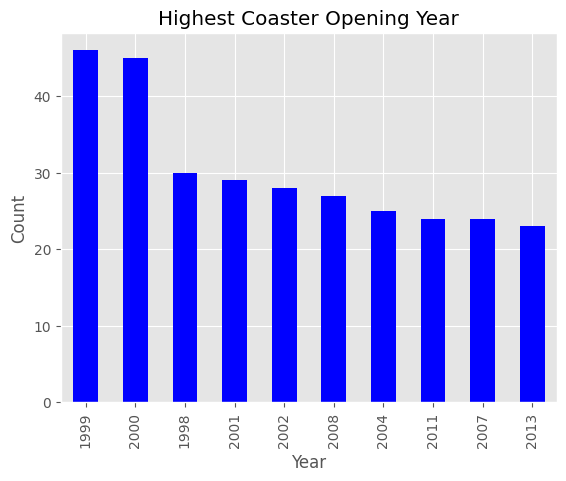

In [90]:
#To see Unique Values
ax = df['Year_Open'].value_counts().head(10).plot(kind='bar', color='blue', title='Highest Coaster Opening Year')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

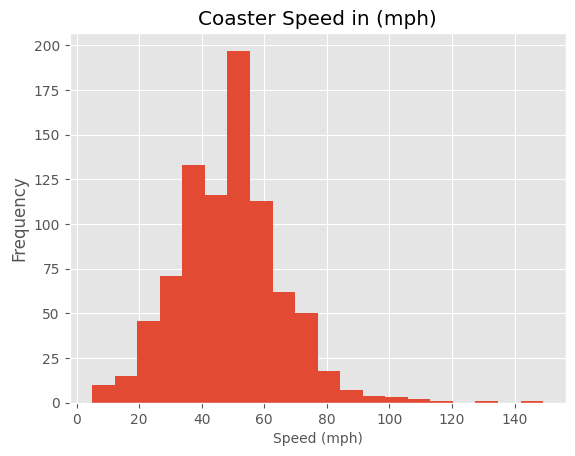

In [98]:
ax = df['Speed_mph'].plot(kind='hist', bins=20, title='Coaster Speed in (mph)')
ax.set_xlabel('Speed (mph)', size=10)

Text(0.5, 0, 'Speed (mph)')

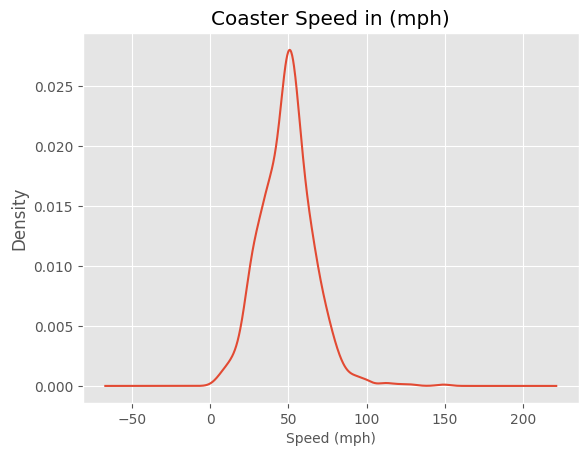

In [100]:
ax = df['Speed_mph'].plot(kind='kde', title='Coaster Speed in (mph)')
ax.set_xlabel('Speed (mph)', size=10)

# **Step 4: Feature Relationships**


*   Scatterplot
*   Heatmap Correlation
*   Pairplot
*   Groupby comparasions



In [101]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Open,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


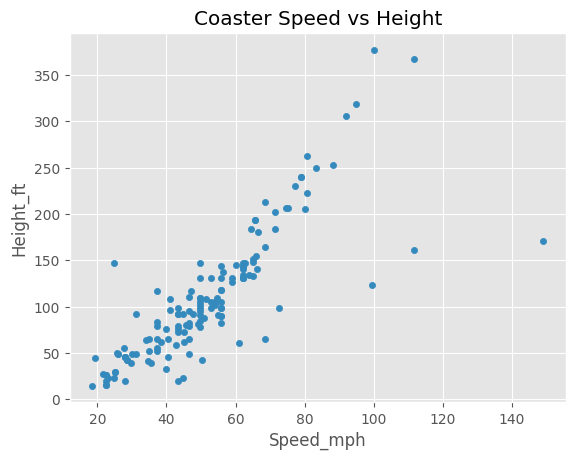

In [103]:
df.plot(kind='scatter',
        x='Speed_mph',
        y= 'Height_ft',
        title= 'Coaster Speed vs Height')
plt.show()

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

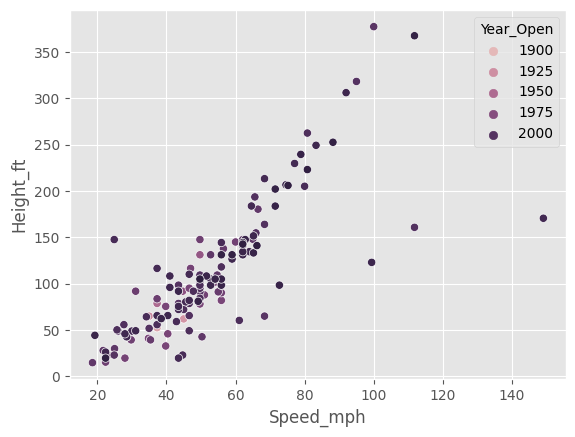

In [104]:
#using seaborn
sns.scatterplot(x='Speed_mph',
                y= 'Height_ft',
                hue= 'Year_Open',
                data=df)

In [105]:
df.dtypes

Coaster_Name            object
Location                object
Status                  object
Manufacturer            object
Year_Open                int64
Latitude               float64
Longitude              float64
Type_Main               object
Opening_Date    datetime64[ns]
Speed_mph              float64
Height_ft              float64
Inversions               int64
Gforce                 float64
dtype: object

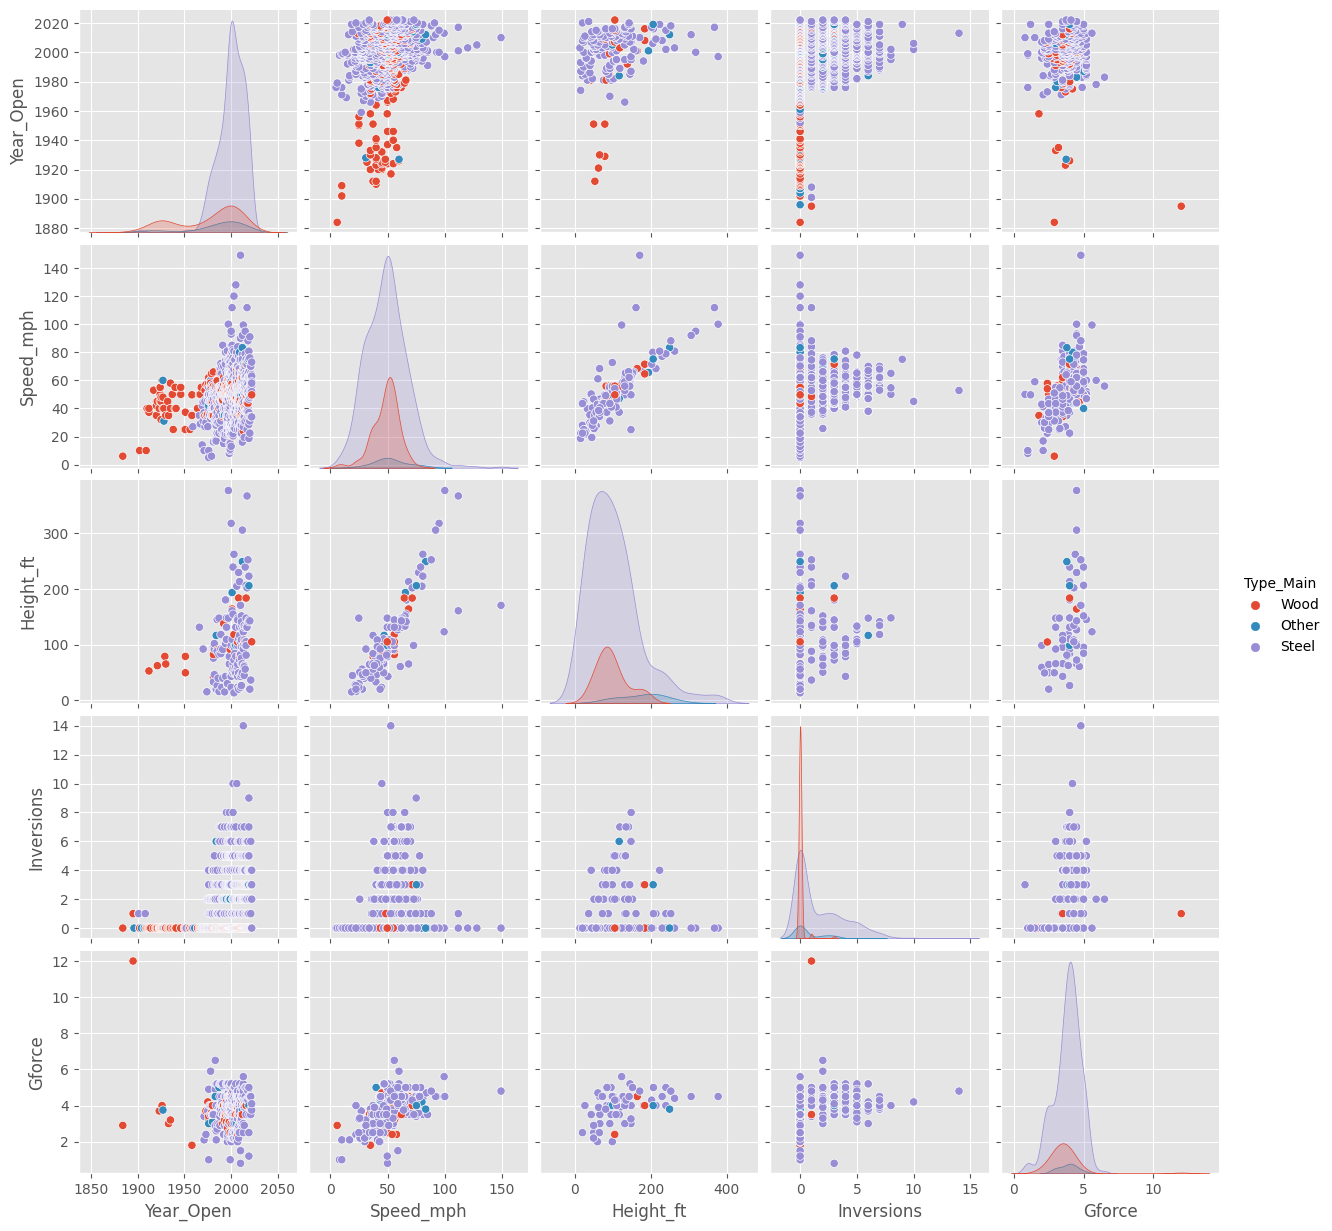

In [106]:
#using seaborn in pairplot
sns.pairplot(df, vars=['Year_Open', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce'], hue='Type_Main')
plt.show()

**Check Correlation**

In [108]:
corr_df = df[['Year_Open', 'Speed_mph', 'Height_ft', 'Inversions', 'Gforce']].dropna().corr()
#drop null and check correlation

<Axes: >

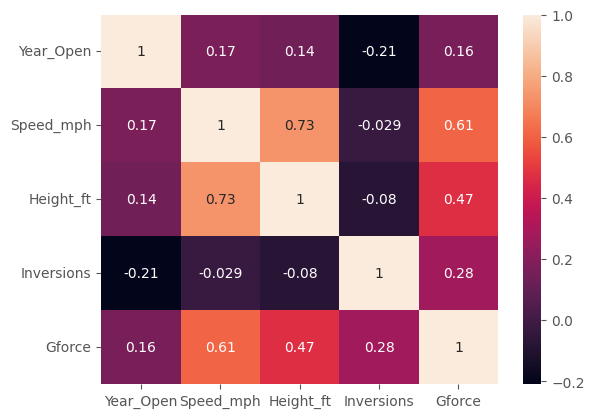

In [109]:
#using heatmap to clearly see the result
sns.heatmap(corr_df, annot=True)
#annot=True for adding the corr value in graph

# **Step 5: Ask a Question about the Data**

**1. What are the Locations with the fastest roller coasters?**

<Axes: title={'center': 'Average Roller Coaster Speed by Location'}, ylabel='Location'>

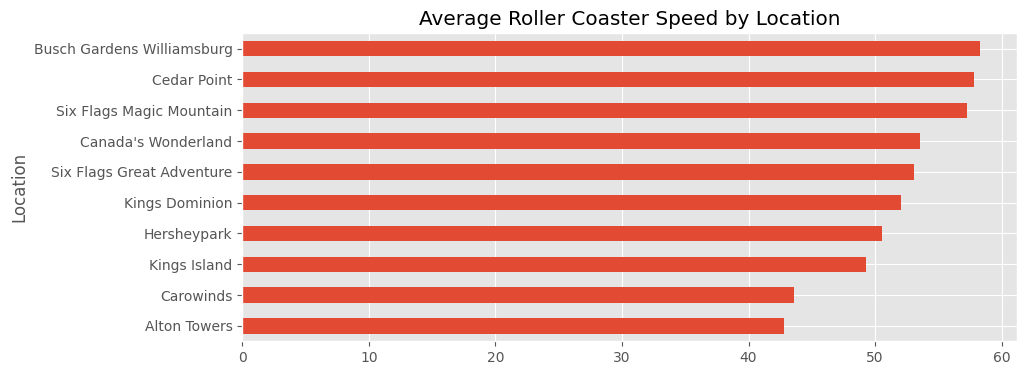

In [117]:
df.query('Location != "Other"')\
.groupby('Location')['Speed_mph']\
.agg(['mean', 'count'])\
.query('count >=10')\
.sort_values('mean')['mean']\
.plot(kind='barh', figsize=(10, 4), title='Average Roller Coaster Speed by Location')

#['Speed_mph']to count only that perticular column, we count the speed_mph data based on location group
#['mean'] yo only use mean data in plot

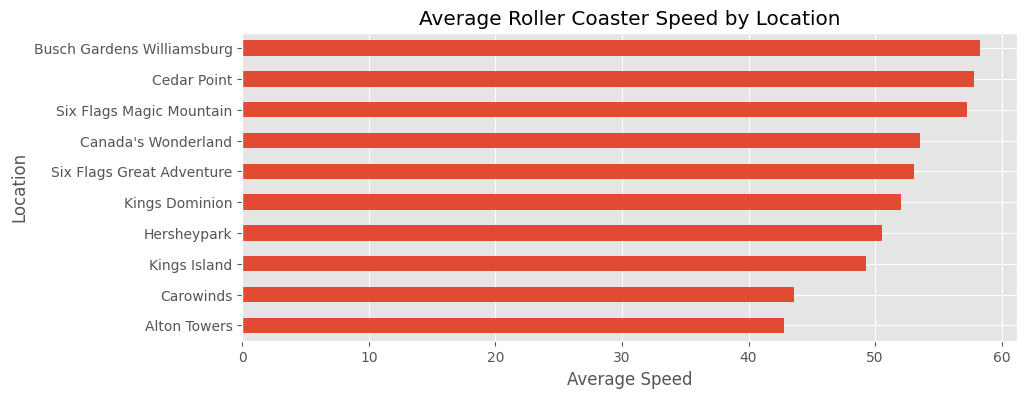

In [119]:
#edit the graph
ax = df.query('Location != "Other"')\
.groupby('Location')['Speed_mph']\
.agg(['mean', 'count'])\
.query('count >=10')\
.sort_values('mean')['mean']\
.plot(kind='barh', figsize=(10, 4), title='Average Roller Coaster Speed by Location')

ax.set_xlabel('Average Speed')
plt.show()